# Yrtemelet assignment

*The data set is a drug review data set. The reviews are grouped into reports and ratings
on the three aspects benefits, side effects and overall comment.
Data: Attached as two files (test_data.tsv, training_data.tsv)*<br><br>
**Task:** Predict the overall review, side effect and effectiveness rating based on the patient
text reviews. Main focus should be on predicting the overall review rating based on the
overall comment. The data is already split into training and test data.<br>
**Input:**
    - Info: Drug name, Condition
    - Rating: overall, side effect and effectiveness ratings
    - Text: overall, side effect and effectiveness reviews
**Output:** Build a model based on NLP (Natural Language Processing) / Machine Learning
techniques to predict the ratings in the test data and find meaningful ways of representing
the data and results.<br>
**Comments:** Usually when we get a reporting task, neither we or the people who requests
the report knows exactly what we will find inside. Sometimes we know what we want, and
formulate the questions so that we get our point through. Sometimes people have a query
(e.g. how many of the drugs are recommended by the patients). Finally there is the
completely open ended investigations, where we try to find patterns we did not know about
before. The latest kind of report is usually the most valuable ones, business wise. It adds
insight and learnings, while the others are more about driving an agenda.

## CLEANING DATA

Test and training data sets consists of text columns that needs to be cleared or converted to numerical values for further NLP and ML processing

### 1. Loading train and test data set from .tsv files to pandas dataframes  

In [ ]:
train_dataset = pd.read_csv('training_data.tsv', sep='\t', header=0)
test_dataset = pd.read_csv('test_data.tsv', sep='\t', header=0)

### 2. Deleting null values from train data set

Let's show the proportion of null values within each feature to make a decision if rows with empty cells can be deleted or filled with most relevant values.

In [45]:
(train_dataset.isna().sum()/len(train_dataset)).sort_values()

Unnamed: 0           0.000000
urlDrugName          0.000000
rating               0.000000
effectiveness        0.000000
sideEffects          0.000000
benefitsReview       0.000000
condition            0.000322
sideEffectsReview    0.000644
commentsReview       0.002575
dtype: float64

From above, we can say that there are single rows with empty cells and deleting them will have no impact on training the model.

Function deleting rows with empty values in train data set:

### 3. Converting text categories to numerical values for 'effectiveness' and 'sideEffects' columns in train and test data sets

### 4. Decontracting specific words in columns with text reviews for further sentiment analysis for both train and test data sets

### 5. Clearing texts in columns with reviews using regular expressions

### 6. Adding columns with reviews sentiment features

### 7. Adding columns with reviews word count

### 8. Adding column with numerical value of a drug

### 9. Adding column with numerical value of a condition

### 10. Writing converted data sets to files  

## FEATURES SELECTION (for final rating predictions)

The output of drugs review cleaning process are two .csv files representing training (*train_output.csv*) and testing (*test_output.csv"*) data sets. Next step is to identify which features from clean data set are the most important and can give the biggest value for training the model and finally predicting the **rating of a drug**. First of all, let's print which features from clean data  set are going to be taken into account:

In [ ]:
import pandas as pd
df1 = pd.read_csv('train_output.csv', sep=';')

In [12]:
X_train = df1[['effectiveness', 'sideEffects', 'benefitsReview_polarity', 'benefitsReview_subjectivity',
                'sideEffectsReview_polarity', 'sideEffectsReview_subjectivity', 'commentsReview_polarity',
                'commentsReview_subjectivity', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len']]
y_train = df1[['rating']]

### 1. Features descriptions

**effectiveness** - natural number (range 0 to 4) representing the drug effectiveness rating. (*0 is 'Ineffective', 1 is 'Marginally Effective', 2 is 'Moderately Effective', 3 is 'Considerably Effective', 4 is 'Highly Effective'*)<br><br>
**sideEffects** - natural number (range 0 to 4) representing the level of drug's siede effects (*0 is 'Extremely Severe Side, 1 is 'Severe Side Effects', 2 is 'Moderate Side Effects', 3 is 'Mild Side Effects', 4 is'No Side Effects'*)<br><br>
**benefitsReview_polarity** - numerical value (between 0 and 1) indicating if the benefits review is positive, neautral or negative (0 - negativity borderline, 0.5 - neutral, 1 - positivity borderline)<br><br>
**benefitsReview_subjectivity** - numerical value (between 0 and 1) indicating if the benefits review is objective fact statement or subjective opinion (0 - objectivity borderline, 1 - subjectivity borderline)<br><br>
**sideEffectsReview_polarity** - numerical value (between 0 and 1) indicating if the side effects review is positive, neautral or negative (0 - negativity borderline, 0.5 - neutral, 1 - positivity borderline)<br><br>
**sideEffectsReview_subjectivity** - numerical value (between 0 and 1) indicating if the side effects review is objective fact statement or subjective opinion (0 - objectivity borderline, 1 - subjectivity borderline)<br><br>
**commentsReview_polarity** - numerical value (between 0 and 1) indicating if the comments review is positive, neautral or negative (0 - negativity borderline, 0.5 - neutral, 1 - positivity borderline)<br><br>
**commentsReview_subjectivity** - numerical value (between 0 and 1) indicating if the comments review is objective fact statement or subjective opinion (0 - objectivity borderline, 1 - subjectivity borderline)<br><br>
**urlDrugName_group** - natural number indicating the name/group of a drug<br><br>
**condition_group** - natural number indicating patient's name/group of a condition<br><br>
**benefitsReview_len** - natural number representing the number of words in drug's benefits review<br><br>
**sideEffectsReview_len** - natural number representing the number of words in drug's side effects review<br><br>
**commentsReview_len** - natural number representing the number of words in drug's comments review<br><br><br>
**rating** - 'rating' is a target value, that we will be predicting on test data set. It is a natural number from 1 to 10.

In [46]:
X_train.head()

,effectiveness,sideEffects,benefitsReview_polarity,benefitsReview_subjectivity,sideEffectsReview_polarity,sideEffectsReview_subjectivity,commentsReview_polarity,commentsReview_subjectivity,urlDrugName_group,condition_group,benefitsReview_len,sideEffectsReview_len,commentsReview_len
0,4,3,0.426389,0.225000,0.341667,0.30000,0.50000,0.100000,1,1,26,19,10
1,4,1,0.775000,0.650000,0.514773,0.57197,0.10000,0.900000,2,2,33,43,11
2,4,4,0.460714,0.545238,0.575000,0.65000,0.47963,0.602469,3,3,45,6,69
3,1,3,0.454167,0.195833,0.511111,0.40000,0.50000,0.000000,4,4,105,18,25
4,1,1,0.500000,0.100000,0.437500,1.00000,0.50000,0.100000,5,5,22,28,2


### 2. Checking correlation between features

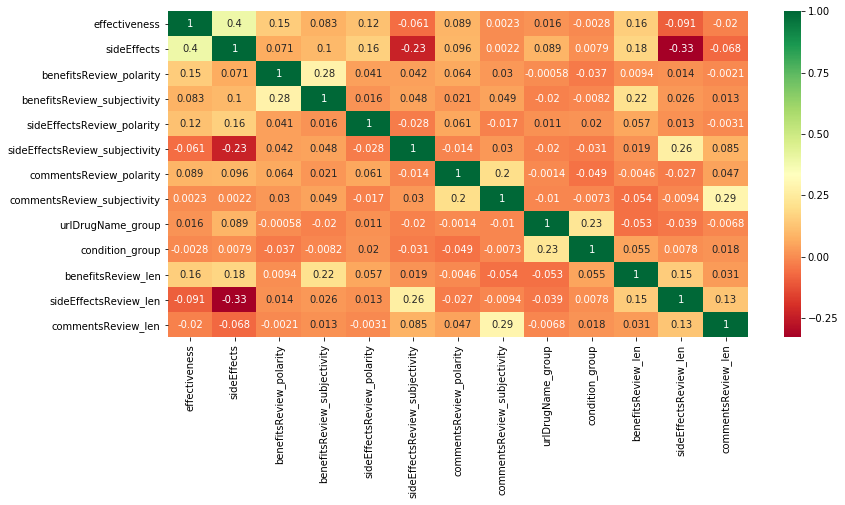

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

X_train = df1[['effectiveness', 'sideEffects', 'benefitsReview_polarity', 'benefitsReview_subjectivity',
                'sideEffectsReview_polarity', 'sideEffectsReview_subjectivity', 'commentsReview_polarity',
                'commentsReview_subjectivity', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len']]
y_train = df1[['rating']]

X = X_train  
y = y_train  

corr_matrix = X.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(13, 6))
g=sns.heatmap(X[corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

SUMMARY: from feature correlation matrix, we can read that all features are not correlated with each other, so for now there is no point in excluding any of the selected features. The biggest correlation is between side effects value and side effect's review length and its subjectivity. However, the correlation is low and having in mind that we are going to predict the overall rating of the drug, both features can be useful in training the model.  

### 3. Checking feature importance

[0.16137535 0.10391545 0.06345904 0.06683181 0.06201211 0.0647444
 0.05851017 0.06747057 0.07394235 0.06833933 0.06979187 0.0717219
 0.06788566]


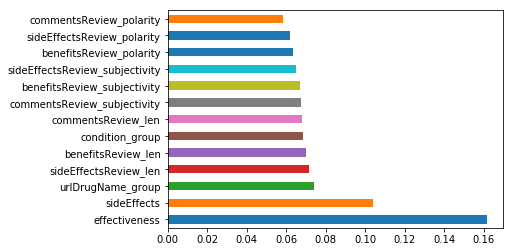

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

X_train = df1[['effectiveness', 'sideEffects', 'benefitsReview_polarity', 'benefitsReview_subjectivity',
                'sideEffectsReview_polarity', 'sideEffectsReview_subjectivity', 'commentsReview_polarity',
                'commentsReview_subjectivity', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len']]
y_train = df1[['rating']]


X = X_train  
y = y_train  

model = ExtraTreesClassifier()
model.fit(X,y.values.ravel())
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

SUMMARY: Feature importance is an inbuilt class that comes with Extra Tree Classifier for extracting the most important features in training data set. Feature importance gives a score for each feature, the higher the score the more important or relevant is the feature towards output variable, which is overall rating. As it can be concluded from above, effectiveness and side effects values are the most relevant features and there is not any feature that can be noticeable treated as not important

### 4. Univariate Selection

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train = df1[['effectiveness', 'sideEffects', 'benefitsReview_polarity', 'benefitsReview_subjectivity',
                'sideEffectsReview_polarity', 'sideEffectsReview_subjectivity', 'commentsReview_polarity',
                'commentsReview_subjectivity', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len']]
y_train = df1[['rating']]

X = X_train  
y = y_train

bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

featureScores = pd.concat([df_columns, df_scores], axis=1)
featureScores.columns = ['Feature', 'Score']  
print(featureScores.sort_values(by='Score', ascending=False))  

                           Feature        Score
11           sideEffectsReview_len  6695.108958
9                  condition_group  6303.842011
10              benefitsReview_len  4360.830651
8                urlDrugName_group  1288.636747
0                    effectiveness   897.971015
1                      sideEffects   754.359400
12              commentsReview_len   471.963413
5   sideEffectsReview_subjectivity    12.109676
3      benefitsReview_subjectivity     8.829543
4       sideEffectsReview_polarity     2.036328
2          benefitsReview_polarity     1.164910
7      commentsReview_subjectivity     1.069074
6          commentsReview_polarity     0.530393


SUMMARY: Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable. I used the chi-squared (chi²) statistical test for non-negative features to select the best features from the training data set. Based on this selection method, we can see that polarity and subjectivity of the reviews has much lower dependency on predicting the rating score of the drug. It will be verified later (please see: *MODEL SELECTION point 2. Scoring for selected models, limiting train and test data sets*)

##  MODEL SELECTION

### 1. Scoring for selected models (with default parameters)  

In [27]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings; warnings.simplefilter('ignore')


df1 = pd.read_csv('train_output.csv', sep=';')
df2 = pd.read_csv('test_output.csv', sep=';')

X_train = df1[['effectiveness', 'sideEffects', 'benefitsReview_polarity', 'benefitsReview_subjectivity',
                'sideEffectsReview_polarity', 'sideEffectsReview_subjectivity', 'commentsReview_polarity',
                'commentsReview_subjectivity', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len']]
y_train = df1[['rating']]

X_test = df2[['effectiveness', 'sideEffects', 'benefitsReview_polarity', 'benefitsReview_subjectivity',
                'sideEffectsReview_polarity', 'sideEffectsReview_subjectivity', 'commentsReview_polarity',
                'commentsReview_subjectivity', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len']]

y_test = df2[['rating']]


def prediction(model):

    # mean accuracy with cross validation
    cv_accuracy = cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    print("Mean cross validation accuracy is {}".format(cv_accuracy.mean()))

    # training selected model
    model.fit(X_train, y_train.values.ravel())

    # making prediction on test data set
    y_pred = model.predict(X_test)

    # measuring accuracy score for selected model
    acc_score = accuracy_score(y_test, y_pred)
    print('Predicted accuracy is :{}\n'.format(acc_score))



clf_logreg = LogisticRegression()
print('Logistic Regression')
prediction(clf_logreg)

clf_rf = RandomForestClassifier()
print('Random Forest')
prediction(clf_rf)

clf_gnb = GaussianNB()
print('Gaussian Naive Bayes')
prediction(clf_gnb)

clf_xgb = XGBClassifier()
print('XGBoost')
prediction(clf_xgb)

Logistic Regression
Mean cross validation accuracy is 0.4160352241920805
Predicted accuracy is :0.4092664092664093

Random Forest
Mean cross validation accuracy is 0.41606280730476664
Predicted accuracy is :0.3967181467181467

Gaussian Naive Bayes
Mean cross validation accuracy is 0.4412114418583659
Predicted accuracy is :0.4198841698841699

XGBoost
Mean cross validation accuracy is 0.45895841828231354
Predicted accuracy is :0.44787644787644787



SUMMARY: For train and test data set whithout excluding any feature, verified models score almost the same accuracy.

### 2. Scoring for selected models, limiting train and test data sets

From univariate feature selection that determine the strength of the relationship between a feature and target variable, w concluded that polarity and subjectivity of drug text reviews may not be that imporant for final drug rating prediction. Let's check that hypothesis limiting the datasets by excluding the following features from data sets('benefitsReview_polarity', 'sideEffectsReview_subjectivity', 'commentsReview_polarity','commentsReview_subjectivity') and check models scoring. 

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings; warnings.simplefilter('ignore')


df1 = pd.read_csv('train_output.csv', sep=';')
df2 = pd.read_csv('test_output.csv', sep=';')

X_train = df1[['effectiveness', 'sideEffects', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len', 'benefitsReview_subjectivity', 'sideEffectsReview_polarity']]
y_train = df1[['rating']]

X_test = df2[['effectiveness', 'sideEffects', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len', 'benefitsReview_subjectivity', 'sideEffectsReview_polarity']]
y_test = df2[['rating']]


def prediction(model):

    # mean accuracy with cross validation
    cv_accuracy = cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    print("Mean cross validation accuracy is {}".format(cv_accuracy.mean()))

    # training selected model
    model.fit(X_train, y_train.values.ravel())

    # making prediction on test data set
    y_pred = model.predict(X_test)

    # measuring accuracy score for selected model
    acc_score = accuracy_score(y_test, y_pred)
    print('Predicted accuracy is :{}\n'.format(acc_score))



clf_logreg = LogisticRegression()
print('Logistic Regression')
prediction(clf_logreg)

clf_rf = RandomForestClassifier()
print('Random Forest')
prediction(clf_rf)

clf_gnb = GaussianNB()
print('Gaussian Naive Bayes')
prediction(clf_gnb)

clf_xgb = XGBClassifier()
print('XGBoost')
prediction(clf_xgb)

Logistic Regression
Mean cross validation accuracy is 0.4134263038613245
Predicted accuracy is :0.4083011583011583

Random Forest
Mean cross validation accuracy is 0.42796450042039236
Predicted accuracy is :0.4063706563706564

Gaussian Naive Bayes
Mean cross validation accuracy is 0.4506013924588882
Predicted accuracy is :0.4266409266409266

XGBoost
Mean cross validation accuracy is 0.4531602833494312
Predicted accuracy is :0.444980694980695



SUMMARY: After excluding the least important features pointed by univariate feature selection, selected models score better in accuracy.

### 3. Models' parameters tunnig

Selected models' accuracy scores were achieved, with default parameters for each model. To achieve better results, I will use GridSearchCV to verify the models' scores for different combinations of proposed parameters' values. Proposals for prameters' values were done based on Machine Learning publications to select the most adequate ones for solving the problem.

The code below selects the best set of proposed parameters for each model in order to maximize the accuracy score: 

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time
import warnings; warnings.simplefilter('ignore')



df1 = pd.read_csv('train_output.csv', sep=';')
df2 = pd.read_csv('test_output.csv', sep=';')

X_train = df1[['effectiveness', 'sideEffects', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len', 'benefitsReview_subjectivity', 'sideEffectsReview_polarity']]
y_train = df1[['rating']]

X_test = df2[['effectiveness', 'sideEffects', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len', 'benefitsReview_subjectivity', 'sideEffectsReview_polarity']]
y_test = df2[['rating']]

def select_model(X, Y):
    best_models = {}
    models = [
        {
            'name': 'LogisticRegression',
            'estimator': LogisticRegression(),
            'hyperparameters': {
                'solver': ['newton-cg', 'sag', 'lbfgs'],
                'C': [0.001, 0.01, 0.1, 1, 10],
                'max_iter': [10, 100, 150]
            },
        },
        
        {
            'name': 'RandomForest',
            'estimator': RandomForestClassifier(),
            'hyperparameters': {
                'bootstrap': ['True'],
                'criterion': ['entropy'],
                'max_features': [0.4, 0.5, 0.55, 0.6],
                'min_samples_leaf': [5, 10, 20],
                'min_samples_split': [2, 6, 10],
                'n_estimators': [20, 50, 100]
            }
        },

        {
            'name': 'GaussianNB',
            'estimator': GaussianNB(),
            'hyperparameters': {}
        },
        {
            'name': 'XGBoost',
            'estimator': XGBClassifier(),
            'hyperparameters': {
                'learning_rate': [0.01, 0.05],
                'colsample_bytree': [0.5, 0.8],
                'subsample': [0.8],
                'n_estimators': [150, 1000],
                'reg_alpha': [0.3],
                'max_depth': [4, 5, 6],
                'gamma': [1, 5],
                'eval_metric': ['mae']
            }

        }
        
    ]

    for model in models:
        print('\n', '-'*20, '\n', model['name'])
        start = time.perf_counter()
        grid = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=5, scoring="accuracy",
                            verbose=False, n_jobs=1)
        grid.fit(X, Y.values.ravel())
        best_models[model['name']] = {'score': grid.best_score_, 'params': grid.best_params_}
        run = time.perf_counter() - start
        print('accuracy: {}\n{} --{:.2f} seconds.'.format(str(grid.best_score_), str(grid.best_params_), run))

    return best_models

X_train = df1[['effectiveness', 'sideEffects', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len', 'benefitsReview_subjectivity', 'sideEffectsReview_polarity']]
y_train = df1[['rating']]

X, y = X_train, y_train
# best = select_model(X, y)

Running the 'select_model' function is commented for presentation purpose only, because of the fact that it is time consuming process. Achieved results are presented below:

SUMMARY: Having the best selected parameters, next step is to check the final results for drug rating predictions on test data set

## FINAL DRUG REVIEW RATING PREDICTIONS (on test data set)


In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import warnings; warnings.simplefilter('ignore')


df1 = pd.read_csv('train_output.csv', sep=';')
df2 = pd.read_csv('test_output.csv', sep=';')

X_train = df1[['effectiveness', 'sideEffects', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len', 'benefitsReview_subjectivity', 'sideEffectsReview_polarity']]
y_train = df1[['rating']]

X_test = df2[['effectiveness', 'sideEffects', 'urlDrugName_group', 'condition_group', 'benefitsReview_len',
               'sideEffectsReview_len', 'commentsReview_len', 'benefitsReview_subjectivity', 'sideEffectsReview_polarity']]
y_test = df2[['rating']]

def prediction(model):

    # mean accuracy with cross validation
    cv_accuracy = cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    print("Mean cross validation accuracy is {}".format(cv_accuracy.mean()))

    # training selected model
    model.fit(X_train, y_train.values.ravel())

    # making prediction on test data set
    y_pred = model.predict(X_test)

    # measuring accuracy score for selected model
    acc_score = accuracy_score(y_test, y_pred)
    print('Predicted accuracy is :{}\n'.format(acc_score))



clf_logreg = LogisticRegression(C=1, max_iter=100, solver='newton-cg')
print('Logistic Regression')
prediction(clf_logreg)

clf_rf = RandomForestClassifier(bootstrap=True,  criterion="entropy", max_features=0.55, min_samples_leaf=20, min_samples_split=10, n_estimators=100)
print('Random Forest')
prediction(clf_rf)

clf_gnb = GaussianNB()
print('Gaussian Naive Bayes')
prediction(clf_gnb)

clf_xgb = XGBClassifier(colsample_bytree=0.8, eval_metric='mae', gamma=1, learning_rate=0.01, max_depth=6, n_estimators=150, reg_alpha=0.3, subsample=0.8)
print('XGBoost')
prediction(clf_xgb)


Logistic Regression
Mean cross validation accuracy is 0.43219420105669126
Predicted accuracy is :0.416023166023166

Random Forest
Mean cross validation accuracy is 0.47606056837604055
Predicted accuracy is :0.47586872586872586

Gaussian Naive Bayes
Mean cross validation accuracy is 0.4506013924588882
Predicted accuracy is :0.4266409266409266

XGBoost
Mean cross validation accuracy is 0.46279874819278444
Predicted accuracy is :0.4420849420849421



SUMMARY: It occured that, for my data sets, the best selected model for predicting the overall rating of a drug is<br>
**Random Forest with accuracy 0.4758**

## THOUGHTS ABOUT THE ASSIGNMENT:
The main goal for solving the assignmnet was to present the knowledge and skills I already have as a Data Scientist. However, this assignment is a research which can be continued. There are several things that can be done and verified, especially in feature engineering process. For example: grouping of drugs names and conditions name can be done taking into account that their values are not cleared and have mistakes, reviews (side effects, benefits, comments) could be treated sepperately, each text could be splitted, stemmed and additional features representing n-grams could be added to data sets. Reviews polarity could be represented by 2 (positive/negative) or 3 (positive/neutral/negative) values. The same with lenghts of the reviews - they can be group by short/normal/long values. Additionally, other models like Support Vector Machine could be then checked on data sets composed from different sets of features. And last but not least deep learning techniques like TensorFlow, which is quite precise, but can be time consuming, could be also verifed.    

## DATA FOR DECISION MAKING

My model predicts the overall rating of a drug with ~0.48 accuracy and mean absolut error while comparing true and predicted values for the whole predictions is only ~1.007. It means that in average our predictions can vary by 1. 

To make a decision if the drug should be prescribed based on overall rating, let's group the results by 'drug name' and 'condition'

### 1. Drugs' results (based on test data set)

In [45]:
drugs = pd.read_csv('drugs.csv', sep=';')
drugs.head(10)

,Drug name,Effectiveness (1-5),Side effects (1-5),Benefits review polarity (0-1),Side effects review polarity (0-1),Comments review polarity (0 - 1),Number of reviews,Prediction mae,Predicted rating (1 - 10)
0,abilify,2.000000,3.000000,0.552546,0.617647,0.441667,3,1.666667,5.666667
1,acanya,4.000000,3.000000,0.625000,0.406863,0.500000,1,1.000000,10.000000
2,accutane,3.375000,1.937500,0.504278,0.502599,0.551960,16,0.812500,7.187500
3,aciphex,3.666667,2.000000,0.733750,0.557516,0.476389,3,1.666667,6.333333
4,actonel,2.000000,2.000000,0.500000,0.526377,0.666667,1,1.000000,6.000000
5,acyclovir,3.500000,3.750000,0.516250,0.612418,0.495725,4,0.500000,9.250000
6,adderall,3.444444,2.888889,0.598073,0.572679,0.559663,9,0.555556,8.666667
7,adderall-xr,3.600000,1.600000,0.670556,0.464748,0.555053,5,2.200000,5.200000
8,adipex-p,3.166667,2.666667,0.544964,0.499951,0.532440,6,0.500000,7.500000
9,advair-diskus,4.000000,4.000000,0.475000,0.455882,0.478125,2,0.000000,10.000000


### 2. Drugs' results for specific condition

In [80]:
conditions = pd.read_csv('conditions.csv', sep=';')
conditions.head(10)

,Condition,Drug name,Effectiveness (0-4),Side effects (0-4),Benefits review polarity (0-1),Side effects review polarity (0-1),Comments review polarity (0-1),Number of reviews,Prediction mae,Predicted rating (1-10)
0,1mg,propecia,3.000000,3.0,0.630314,0.457516,0.716667,1,1.000000,8.000000
1,2,aricept,4.000000,4.0,0.825000,0.911765,0.825000,1,1.000000,10.000000
2,2 broken arms,mobic,4.000000,4.0,0.500000,0.529412,0.525000,1,1.000000,10.000000
3,75 mg,effexor,3.000000,3.0,0.652917,0.382353,0.500000,1,0.000000,8.000000
4,? 'heart failure',prinivil,0.000000,2.0,0.800000,0.455882,0.530833,1,2.000000,1.000000
5,acid reflux,nexium,3.333333,4.0,0.511111,0.529412,0.500000,3,0.333333,8.666667
6,acid reflux,prilosec,4.000000,4.0,0.525000,0.529412,0.555278,1,0.000000,10.000000
7,acid reflux / barrett's esophagus,nexium,3.000000,4.0,0.522321,0.676471,0.656250,1,1.000000,9.000000
8,"acid reflux, gerd",protonix,3.000000,4.0,0.500000,0.529412,0.625000,1,1.000000,8.000000
9,acl surgery,percocet,2.000000,2.0,0.500000,0.450980,0.500000,1,1.000000,6.000000


### 3. Example: plots for Acne condition

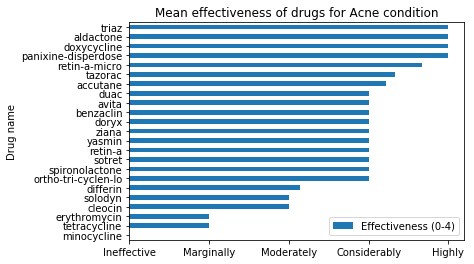

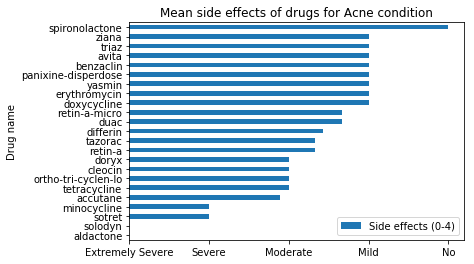

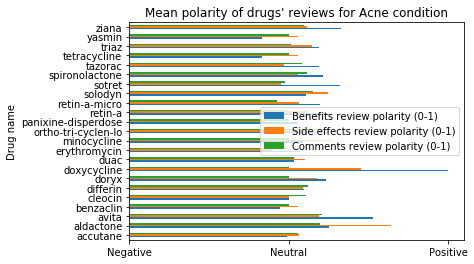

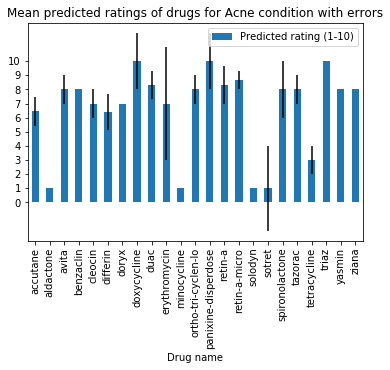

In [82]:
import pandas as pd
import warnings;warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt

conditions = pd.read_csv('conditions.csv', sep=';')

condition_value = 'acne'

dfx = conditions[conditions['Condition'] == condition_value]
dfx = dfx.reset_index(drop=True)

cols = ['Effectiveness (0-4)', 'Side effects (0-4)', 'Benefits review polarity (0-1)',
        'Side effects review polarity (0-1)', 'Comments review polarity (0-1)', 'Number of reviews',
        'Prediction mae', 'Predicted rating (1-10)']
for col in cols:
    dfx[col] = pd.to_numeric(dfx[col])

effectiveness = dfx[['Drug name', 'Effectiveness (0-4)']]
effectiveness.sort_values('Effectiveness (0-4)', ascending=True).plot(x="Drug name", kind="barh")
plt.title('Mean effectiveness of drugs for Acne condition')
text_ticks = ['Ineffective', 'Marginally', 'Moderately', 'Considerably', 'Highly']
numerical_ticks = np.array([0, 1, 2, 3, 4])
plt.xticks(numerical_ticks, text_ticks)

sideEffects = dfx[['Drug name', 'Side effects (0-4)']]
sideEffects.sort_values('Side effects (0-4)', ascending=True).plot(x="Drug name", kind="barh")
plt.title('Mean side effects of drugs for Acne condition')
text_ticks = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'No']
numerical_ticks = np.array([0, 1, 2, 3, 4])
plt.xticks(numerical_ticks, text_ticks)

polarity = dfx[['Drug name', 'Benefits review polarity (0-1)', 'Side effects review polarity (0-1)',
                     'Comments review polarity (0-1)']]
polarity.plot(x="Drug name", kind="barh")
plt.title('Mean polarity of drugs\' reviews for Acne condition')
text_ticks = ['Negative', 'Neutral', 'Positive']
numerical_ticks = np.array([0, 0.5, 1])
plt.xticks(numerical_ticks, text_ticks)

pred_rating = dfx[['Drug name', 'Predicted rating (1-10)']]
err = dfx['Prediction mae'].values

pred_rating.plot(x="Drug name", kind="bar", yerr=err)
plt.title('Mean predicted ratings of drugs for Acne condition with errors')
numerical_ticks = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(numerical_ticks)

plt.show()
